In [2]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [3]:
# Load dataset
diabetes_data_binary = pd.read_csv('diabetes_data_upload.csv') 
diabetes_data_floats = pd.read_csv('diabetes-dataset.csv')

In [4]:
# Display original binary dataset
print(diabetes_data_binary.info())
diabetes_data_binary.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [5]:
# Map string values to int for the binary dataset

# Convert Yes/No values to 1/0 values
diabetes_data_binary = diabetes_data_binary.applymap(lambda x: 1 if x=='Yes' else x)
diabetes_data_binary = diabetes_data_binary.applymap(lambda x: 0 if x=='No' else x)

# Convert Pos/Neg values to 1/0 values
diabetes_data_binary = diabetes_data_binary.applymap(lambda x: 1 if x=='Positive' else x)
diabetes_data_binary = diabetes_data_binary.applymap(lambda x: 0 if x=='Negative' else x)

# Rename Gender column to Male
diabetes_data_binary = diabetes_data_binary.rename(columns={'Gender': 'Male'})

# Convert Male/Female values to 1/0 values
diabetes_data_binary['Male'] = diabetes_data_binary['Male'].map({'Male': 1, 'Female': 0})

In [6]:
# Display binary dataset after data preparation
print(diabetes_data_binary.info())
diabetes_data_binary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Male                520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

,Age,Male,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [7]:
# Display original integer/float dataset
print(diabetes_data_floats.info())
diabetes_data_floats.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [8]:
# Count missing values for integers/floats dataset

In [9]:
diabetes_data_floats[diabetes_data_floats['Glucose']==0].shape[0]

13

In [10]:
diabetes_data_floats[diabetes_data_floats['BloodPressure']==0].shape[0]

90

In [11]:
diabetes_data_floats[diabetes_data_floats['SkinThickness']==0].shape[0]

573

In [12]:
diabetes_data_floats[diabetes_data_floats['Insulin']==0].shape[0]

956

In [13]:
diabetes_data_floats[diabetes_data_floats['BMI']==0].size

252

In [14]:
# Remove all observations with missing values
diabetes_data_floats = diabetes_data_floats[diabetes_data_floats['Glucose']!=0]
diabetes_data_floats = diabetes_data_floats[diabetes_data_floats['BloodPressure']!=0]
diabetes_data_floats = diabetes_data_floats[diabetes_data_floats['SkinThickness']!=0]
diabetes_data_floats = diabetes_data_floats[diabetes_data_floats['Insulin']!=0]
diabetes_data_floats = diabetes_data_floats[diabetes_data_floats['BMI']!=0]

In [15]:
# Display integer/float dataset after data cleaning
print(diabetes_data_floats.info())
diabetes_data_floats.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 1 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1035 non-null   int64  
 1   Glucose                   1035 non-null   int64  
 2   BloodPressure             1035 non-null   int64  
 3   SkinThickness             1035 non-null   int64  
 4   Insulin                   1035 non-null   int64  
 5   BMI                       1035 non-null   float64
 6   DiabetesPedigreeFunction  1035 non-null   float64
 7   Age                       1035 non-null   int64  
 8   Outcome                   1035 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 80.9 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0,84,82,31,125,38.2,0.233,23,0
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
8,2,83,65,28,66,36.8,0.629,24,0
11,4,125,70,18,122,28.9,1.144,45,1
15,2,81,72,15,76,30.1,0.547,25,0
16,7,195,70,33,145,25.1,0.163,55,1
17,6,154,74,32,193,29.3,0.839,39,0
18,2,117,90,19,71,25.2,0.313,21,0


In [16]:
# Computing averages for diabetic and non-diabetic patients using integer/floats dataset

In [17]:
print("Pregnancies")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Pregnancies'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Pregnancies'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Pregnancies'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Pregnancies'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Pregnancies'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Pregnancies'], equal_var=False)

Pregnancies
Non-Diabetic Mean: 2.603151862464183
Diabetic Mean    : 4.3916913946587535

Non-Diabetic std : 2.5541686931203627
Diabetic std     : 3.8960819512872114



Ttest_indResult(statistic=7.669055764939621, pvalue=9.717868756815654e-14)

In [18]:
print("Glucose")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Glucose'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Glucose'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Glucose'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Glucose'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Glucose'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Glucose'], equal_var=False)

Glucose
Non-Diabetic Mean: 111.7378223495702
Diabetic Mean    : 145.84272997032642

Non-Diabetic std : 24.606662425248683
Diabetic std     : 29.136106337756964



Ttest_indResult(statistic=18.53284052946368, pvalue=1.862453776362188e-60)

In [19]:
print("BloodPressure ")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['BloodPressure'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['BloodPressure'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['BloodPressure'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['BloodPressure'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['BloodPressure'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['BloodPressure'], equal_var=False)

BloodPressure 
Non-Diabetic Mean: 68.98424068767908
Diabetic Mean    : 74.5727002967359

Non-Diabetic std : 11.7922491534455
Diabetic std     : 12.599422327405149



Ttest_indResult(statistic=6.825979203640128, pvalue=2.0666122575138323e-11)

In [20]:
print("SkinThickness ")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['SkinThickness'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['SkinThickness'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['SkinThickness'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['SkinThickness'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['SkinThickness'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['SkinThickness'], equal_var=False)

SkinThickness 
Non-Diabetic Mean: 27.302292263610315
Diabetic Mean    : 33.32640949554896

Non-Diabetic std : 10.291672911794015
Diabetic std     : 9.941809106994036



Ttest_indResult(statistic=9.0301455996166, pvalue=1.7188263087543889e-18)

In [21]:
print("Insulin ")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Insulin'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Insulin'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Insulin'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Insulin'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Insulin'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Insulin'], equal_var=False)

Insulin 
Non-Diabetic Mean: 131.3595988538682
Diabetic Mean    : 200.7299703264095

Non-Diabetic std : 99.73279034570396
Diabetic std     : 119.84536697766426



Ttest_indResult(statistic=9.198817762526524, pvalue=6.848789084574853e-19)

In [22]:
print("BMI ")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['BMI'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['BMI'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['BMI'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['BMI'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['BMI'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['BMI'], equal_var=False)

BMI 
Non-Diabetic Mean: 32.08939828080229
Diabetic Mean    : 35.83086053412463

Non-Diabetic std : 6.847662059242316
Diabetic std     : 6.949854197349751



Ttest_indResult(statistic=8.154776053796434, pvalue=1.7833653506931635e-15)

In [23]:
print("Diabetes Pedigree Function")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['DiabetesPedigreeFunction'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['DiabetesPedigreeFunction'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['DiabetesPedigreeFunction'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['DiabetesPedigreeFunction'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['DiabetesPedigreeFunction'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['DiabetesPedigreeFunction'], equal_var=False)

Diabetes Pedigree Function
Non-Diabetic Mean: 0.47991977077363895
Diabetic Mean    : 0.6117329376854599

Non-Diabetic std : 0.2939575738895091
Diabetic std     : 0.38573929468677604



Ttest_indResult(statistic=5.543824040855261, pvalue=4.670348451789813e-08)

In [24]:
# Visualize feature statistics for non-diabetic and diabetic patients using integer/floats dataset

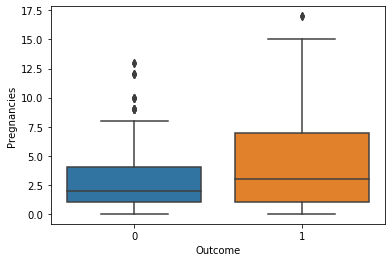

In [25]:
sns.boxplot(x='Outcome',y='Pregnancies',data=diabetes_data_floats)

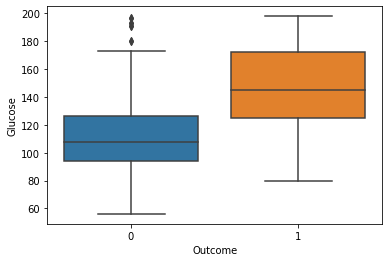

In [26]:
sns.boxplot(x='Outcome',y='Glucose',data=diabetes_data_floats)

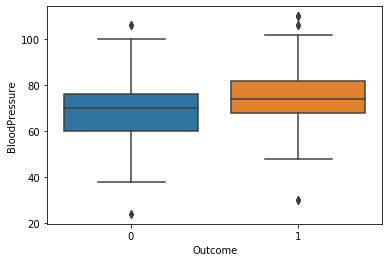

In [27]:
sns.boxplot(x='Outcome',y='BloodPressure',data=diabetes_data_floats)

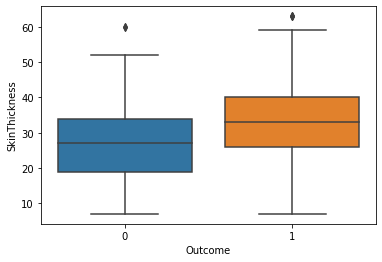

In [28]:
sns.boxplot(x='Outcome',y='SkinThickness',data=diabetes_data_floats)

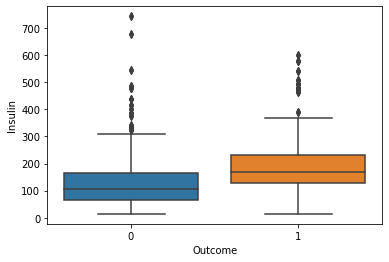

In [29]:
sns.boxplot(x='Outcome',y='Insulin',data=diabetes_data_floats)

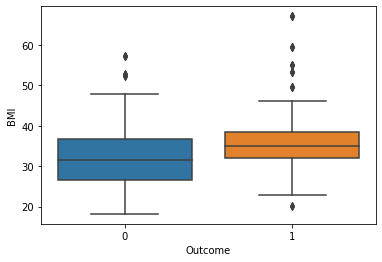

In [30]:
sns.boxplot(x='Outcome',y='BMI',data=diabetes_data_floats)

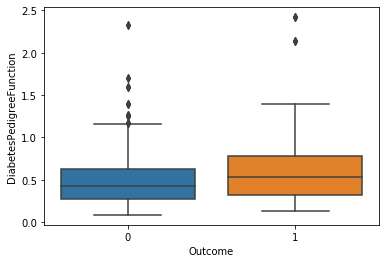

In [31]:
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=diabetes_data_floats)

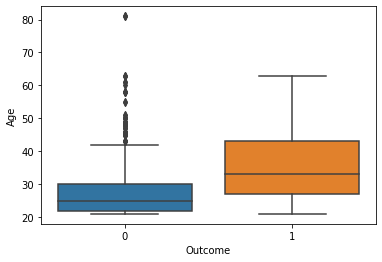

In [32]:
sns.boxplot(x='Outcome',y='Age',data=diabetes_data_floats)

In [33]:
#Most relevant variables seem to be glucose,age,insulin,and skin thickness

In [34]:
# Visualize feature statistics for non-diabetic and diabetic patients using binary dataset

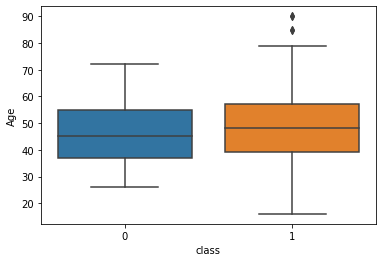

In [35]:
sns.boxplot(x='class',y='Age',data=diabetes_data_binary)

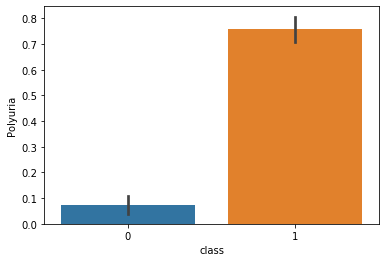

In [36]:
sns.barplot(x='class',y='Polyuria',data=diabetes_data_binary)

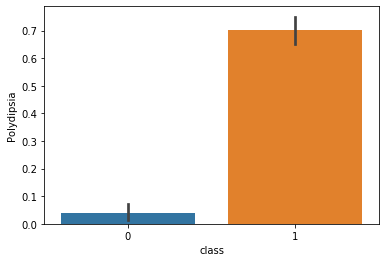

In [37]:
sns.barplot(x='class',y='Polydipsia',data=diabetes_data_binary)

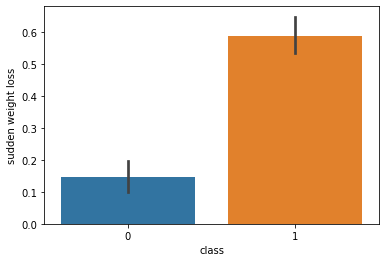

In [38]:
sns.barplot(x='class',y='sudden weight loss',data=diabetes_data_binary)

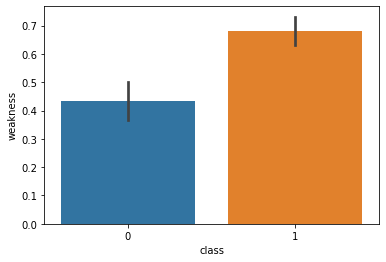

In [39]:
sns.barplot(x='class',y='weakness',data=diabetes_data_binary)

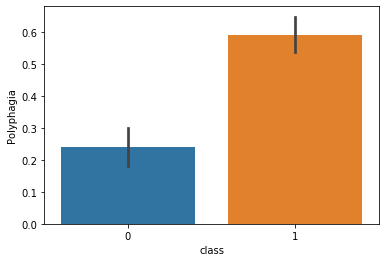

In [40]:
sns.barplot(x='class',y='Polyphagia',data=diabetes_data_binary)

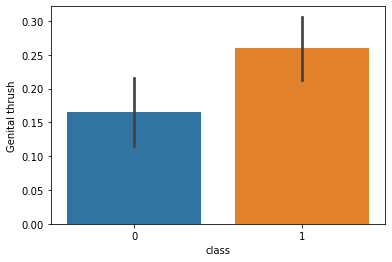

In [41]:
sns.barplot(x='class',y='Genital thrush',data=diabetes_data_binary)

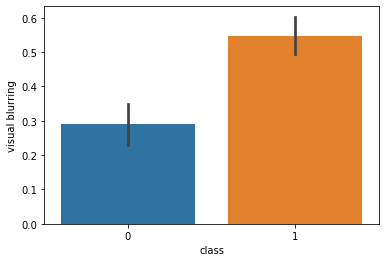

In [42]:
sns.barplot(x='class',y='visual blurring',data=diabetes_data_binary)

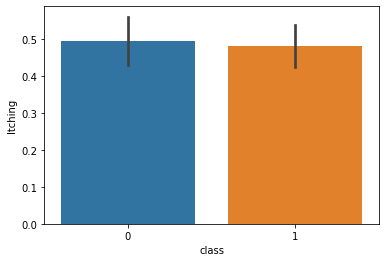

In [43]:
sns.barplot(x='class',y='Itching',data=diabetes_data_binary)

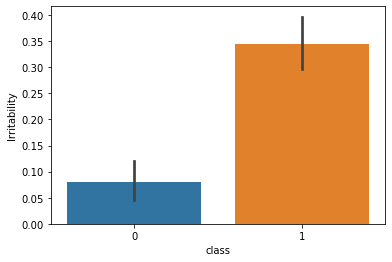

In [44]:
sns.barplot(x='class',y='Irritability',data=diabetes_data_binary)

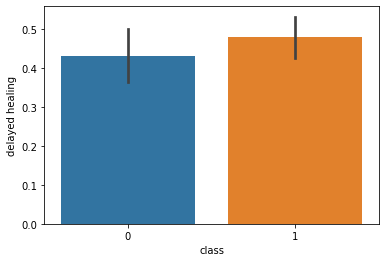

In [45]:
sns.barplot(x='class',y='delayed healing',data=diabetes_data_binary)

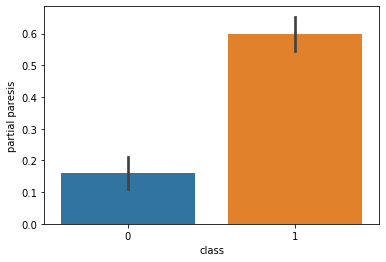

In [46]:
sns.barplot(x='class',y='partial paresis',data=diabetes_data_binary)

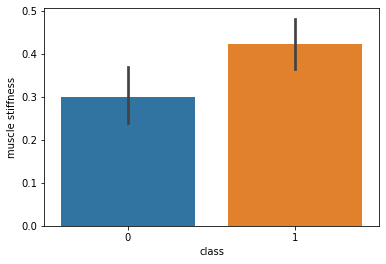

In [47]:
sns.barplot(x='class',y='muscle stiffness',data=diabetes_data_binary)

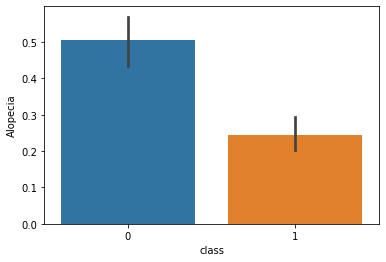

In [48]:
sns.barplot(x='class',y='Alopecia',data=diabetes_data_binary)

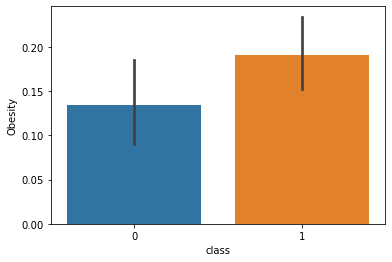

In [49]:
sns.barplot(x='class',y='Obesity',data=diabetes_data_binary)

In [50]:
#most relevant variables seem to be Polyuria,Polydipsia,sudden weight loss,partial paresis,irritability for binary dataset
#most relevant variables for float dataset is Glucose, SkinThickness, Insulin, and Age.

In [178]:
#Classification on diabetes/float dataset
#Some of the models the y_train needs to be reshaped using the ravel function or else a warning will appear
#No change to the models if use ravel code or not

In [52]:
# Partition dataset into training and validationg sets using 80-20 split
x_train, x_val, y_train, y_val = train_test_split(diabetes_data_floats.drop(['Outcome'], axis=1), diabetes_data_floats[['Outcome']], test_size=0.2, random_state=0)

In [53]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(828, 8)
(828, 1)
(207, 8)
(207, 1)


In [54]:
scaler = StandardScaler() 
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_val_scaled = scaler.transform(x_val)

In [149]:
#Decision Trees using different criterions using the relevant variables found above 
Eclassifier = DecisionTreeClassifier(criterion="entropy")
Eclassifier.fit(x_train_scaled[:, [1, 3, 4, 7]],y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [150]:
y_pred = Eclassifier.predict(x_val_scaled[:, [1, 3, 4, 7]])

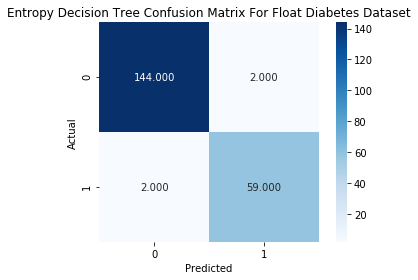

In [151]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Entropy Decision Tree Confusion Matrix For Float Diabetes Dataset')
plt.tight_layout()

In [152]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.9806763285024155, 0.019323671497584516, array([0.98630137, 0.96721311]), array([0.98630137, 0.96721311]), array([0.98630137, 0.96721311])]


In [153]:
Eclassifier = DecisionTreeClassifier(criterion="gini")
Eclassifier.fit(x_train_scaled[:, [1, 3, 4, 7]],y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [154]:
y_pred = Eclassifier.predict(x_val_scaled[:, [1, 3, 4, 7]])

In [155]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.961352657004831, 0.03864734299516903, array([0.97260274, 0.93442623]), array([0.97260274, 0.93442623]), array([0.97260274, 0.93442623])]


In [156]:
#Entropy is better with a better accuracy and F1 score 

In [157]:
#K-nearest Neighbors
#Chose the best number of neighbors based of accuracy
neighbors = [2,3,5,10,15,25,50]
prevAccuracy = 0.0
myN = 0
for n in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = n)
    classifier.fit(x_train_scaled[:, [1, 3, 4, 7]],y_train.values.ravel())
    y_pred = classifier.predict(x_val_scaled[:, [1, 3, 4, 7]])
    accuracy = metrics.accuracy_score(y_val,y_pred)
    if(accuracy > prevAccuracy):
        prevAccuracy = accuracy
        myN = n

print(myN)

2


In [158]:
#2 is the best number of neighbors based on accuracy ''

In [159]:
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(x_train_scaled[:, [1, 3, 4, 7]],y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled[:, [1, 3, 4, 7]])

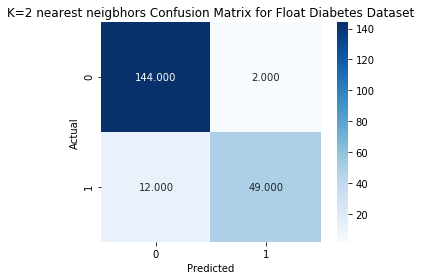

In [160]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('K=2 nearest neigbhors Confusion Matrix for Float Diabetes Dataset')
plt.tight_layout()

In [161]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.9323671497584541, 0.06763285024154586, array([0.92307692, 0.96078431]), array([0.98630137, 0.80327869]), array([0.95364238, 0.875     ])]


In [162]:
#Worse than the decision tree with entropy criterion

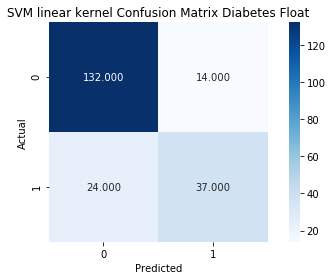

In [163]:
#Svm for float dataset 
#Try to find the best kernel
classifier = SVC(kernel = 'linear')
classifier.fit(x_train_scaled[:, [1, 3, 4, 7]],y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled[:, [1, 3, 4, 7]])

conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM linear kernel Confusion Matrix Diabetes Float')
plt.tight_layout()

In [164]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.8164251207729468, 0.18357487922705318, array([0.84615385, 0.7254902 ]), array([0.90410959, 0.60655738]), array([0.87417219, 0.66071429])]


In [165]:
#Worse than both k-nearest neighbors and decision tree

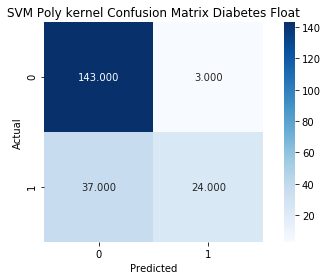

In [167]:
classifier = SVC(kernel = 'poly')
classifier.fit(x_train_scaled[:, [1, 3, 4, 7]],y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled[:, [1, 3, 4, 7]])

conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Poly kernel Confusion Matrix Diabetes Float')
plt.tight_layout()

In [168]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.8067632850241546, 0.19323671497584538, array([0.79444444, 0.88888889]), array([0.97945205, 0.39344262]), array([0.87730061, 0.54545455])]


In [169]:
#Worse than linear kernel

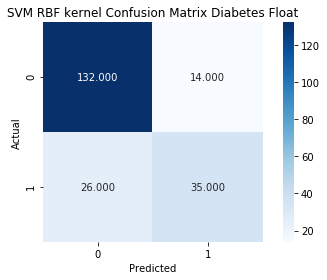

In [170]:
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train_scaled[:, [1, 3, 4, 7]],y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled[:, [1, 3, 4, 7]])

conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM RBF kernel Confusion Matrix Diabetes Float')
plt.tight_layout()

In [171]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.8067632850241546, 0.19323671497584538, array([0.83544304, 0.71428571]), array([0.90410959, 0.57377049]), array([0.86842105, 0.63636364])]


In [172]:
#Worse than linear but better than rbf with the F1 score. Decision tree is still best so far

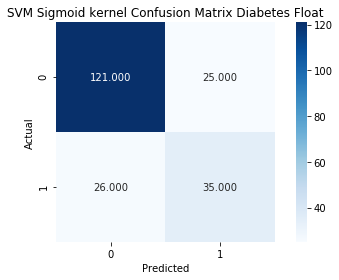

In [173]:
classifier = SVC(kernel = 'sigmoid')
classifier.fit(x_train_scaled[:, [1, 3, 4, 7]],y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled[:, [1, 3, 4, 7]])

conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Sigmoid kernel Confusion Matrix Diabetes Float')
plt.tight_layout()

In [174]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.7536231884057971, 0.24637681159420288, array([0.82312925, 0.58333333]), array([0.82876712, 0.57377049]), array([0.82593857, 0.5785124 ])]


In [175]:
#The worst kernel. The best kernel is linear, best model so far is decision tree 

In [176]:

# Now try to find the best c value
# based on accuracy 
values = [0.001,0.01,0.1,0.5,1.0,5.0,10]
prevAcc = 0.0
cVal = -1
for v in values:
    classifier = SVC(kernel = 'linear', C = v)
    classifier.fit(x_train_scaled[:, [1, 3, 4, 7]],y_train.values.ravel())
    y_pred = classifier.predict(x_val_scaled[:, [1, 3, 4, 7]])
    accuracy = metrics.accuracy_score(y_val,y_pred)
    if(accuracy > prevAcc):
        prevAcc = accuracy
        cVal = v
print(cVal)

0.1


In [197]:
# best C val = 0.1
classifier = SVC(kernel = 'linear', C = 0.1)
classifier.fit(x_train_scaled[:, [1, 3, 4, 7]],y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled[:, [1, 3, 4, 7]])

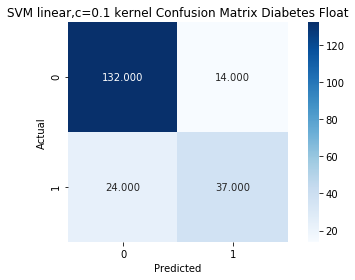

In [198]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM linear,c=0.1 kernel Confusion Matrix Diabetes Float')
plt.tight_layout()

In [199]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.8164251207729468, 0.18357487922705318, array([0.84615385, 0.7254902 ]), array([0.90410959, 0.60655738]), array([0.87417219, 0.66071429])]


In [182]:
#The best svm model is still not as good as decision tree 

In [183]:
#Lets try the best models for each classification using all the variables to see if they give any extra insight.
#Decision Trees using different criterions using the relevant variables found above 
Eclassifier = DecisionTreeClassifier(criterion="entropy")
Eclassifier.fit(x_train_scaled,y_train)
y_pred = Eclassifier.predict(x_val_scaled)


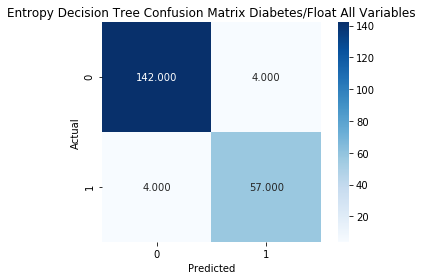

In [184]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Entropy Decision Tree Confusion Matrix Diabetes/Float All Variables')
plt.tight_layout()

In [185]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.961352657004831, 0.03864734299516903, array([0.97260274, 0.93442623]), array([0.97260274, 0.93442623]), array([0.97260274, 0.93442623])]


In [91]:
#This model performs slightly worse than the other decision tree model with the subset of variables  

In [186]:
# K=2 nearest neighbors with a c val of 0.1. All variables
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(x_train_scaled,y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled)

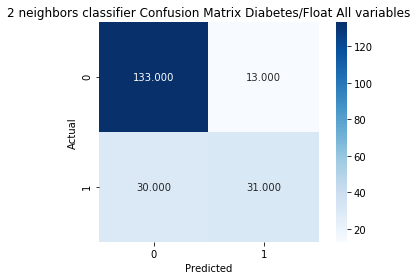

In [189]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("2 neighbors classifier Confusion Matrix Diabetes/Float All variables")
plt.tight_layout()

In [190]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.7922705314009661, 0.20772946859903385, array([0.81595092, 0.70454545]), array([0.9109589 , 0.50819672]), array([0.86084142, 0.59047619])]


In [191]:
#Significantly worse model than the original subset of variables 

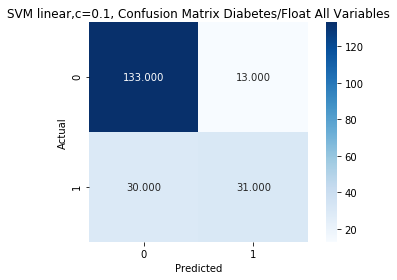

In [195]:
#SVM all variables
classifier = SVC(kernel = 'linear',C=0.1)
classifier.fit(x_train_scaled,y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled)

conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM linear,c=0.1, Confusion Matrix Diabetes/Float All Variables')
plt.tight_layout()

In [196]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.7922705314009661, 0.20772946859903385, array([0.81595092, 0.70454545]), array([0.9109589 , 0.50819672]), array([0.86084142, 0.59047619])]


In [200]:
#Slightly worse than the original subset counterpart model

In [201]:
#Best model for the diabetes float is decision tree subset of variables with entropy criterion. 

In [202]:
#Run classification techniques on the binary dataset 
# Partition dataset into training and validationg sets using 80-20 split
x_train, x_val, y_train, y_val = train_test_split(diabetes_data_binary.drop(['class'], axis=1), diabetes_data_binary[['class']], test_size=0.2, random_state=0)

In [203]:
scaler = StandardScaler() 
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_val_scaled = scaler.transform(x_val)

In [204]:
#Decision Trees using different criterions using the relevant variables found above 
Eclassifier = DecisionTreeClassifier(criterion="entropy")
Eclassifier.fit(x_train_scaled[:, [2, 3, 4, 10,12]],y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [205]:
y_pred = Eclassifier.predict(x_val_scaled[:, [2, 3, 4, 10,12]])

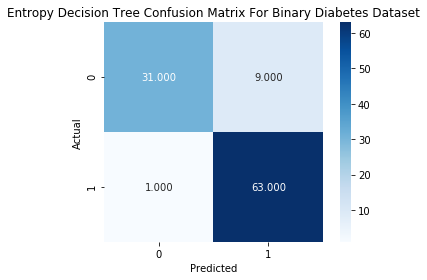

In [207]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Entropy Decision Tree Confusion Matrix For Binary Diabetes Dataset')
plt.tight_layout()

In [208]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.9038461538461539, 0.09615384615384615, array([0.96875, 0.875  ]), array([0.775   , 0.984375]), array([0.86111111, 0.92647059])]


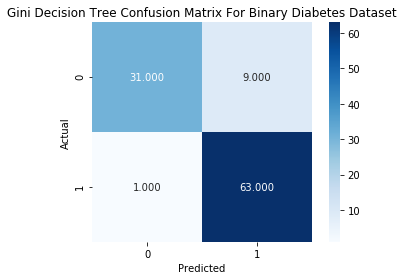

In [211]:
#Now see gini criterion
Eclassifier = DecisionTreeClassifier(criterion="gini")
Eclassifier.fit(x_train_scaled[:, [2, 3, 4, 10,12]],y_train)
y_pred = Eclassifier.predict(x_val_scaled[:, [2, 3, 4, 10,12]])
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Gini Decision Tree Confusion Matrix For Binary Diabetes Dataset')
plt.tight_layout()

In [212]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.9038461538461539, 0.09615384615384615, array([0.96875, 0.875  ]), array([0.775   , 0.984375]), array([0.86111111, 0.92647059])]


In [213]:
#Exactly the same most likely due to the fact these values are binary 

In [214]:
#K-nearest Neighbors
#Chose the best number of neighbors based of accuracy
neighbors = [2,3,5,10,15,25,50]
prevAccuracy = 0.0
myN = 0
for n in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = n)
    classifier.fit(x_train_scaled[:, [2, 3, 4, 10,12]],y_train.values.ravel())
    y_pred = classifier.predict(x_val_scaled[:, [2, 3, 4, 10,12]])
    accuracy = metrics.accuracy_score(y_val,y_pred)
    if(accuracy > prevAccuracy):
        prevAccuracy = accuracy
        myN = n

print(myN)

10


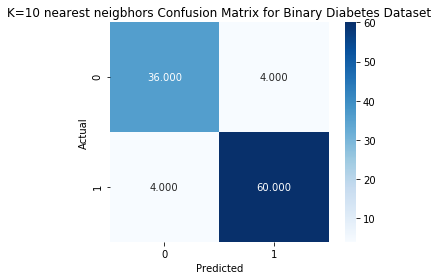

In [217]:
#10 neighbors are the best here

classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train_scaled[:, [2, 3, 4, 10,12]],y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled[:, [2, 3, 4, 10, 12]])
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('K=10 nearest neigbhors Confusion Matrix for Binary Diabetes Dataset')
plt.tight_layout()

In [218]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.9230769230769231, 0.07692307692307687, array([0.9   , 0.9375]), array([0.9   , 0.9375]), array([0.9   , 0.9375])]


In [219]:
#Better than the decision tree results in accuracy and F1 score

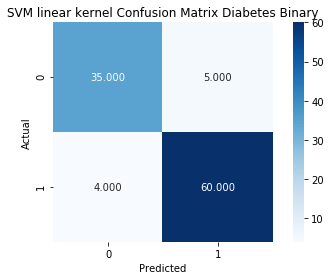

In [223]:
#Lets try SVMs 
classifier = SVC(kernel = 'linear')
classifier.fit(x_train_scaled[:, [2, 3, 4, 10,12]],y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled[:, [2, 3, 4, 10,12]])

conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM linear kernel Confusion Matrix Diabetes Binary')
plt.tight_layout()

In [224]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.9134615384615384, 0.08653846153846156, array([0.8974359 , 0.92307692]), array([0.875 , 0.9375]), array([0.88607595, 0.93023256])]


In [225]:
#Slightly better than decision tree and slightly worse than k-nearest neighbors 

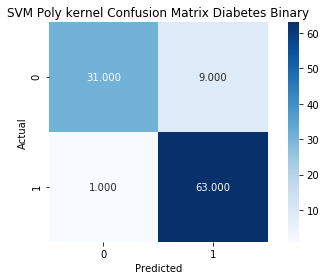

In [226]:
classifier = SVC(kernel = 'poly')
classifier.fit(x_train_scaled[:, [2, 3, 4, 10,12]],y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled[:, [2, 3, 4, 10, 12]])

conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Poly kernel Confusion Matrix Diabetes Binary')
plt.tight_layout()

In [227]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.9038461538461539, 0.09615384615384615, array([0.96875, 0.875  ]), array([0.775   , 0.984375]), array([0.86111111, 0.92647059])]


In [228]:
#About the same as decision trees, but worse than linear svm

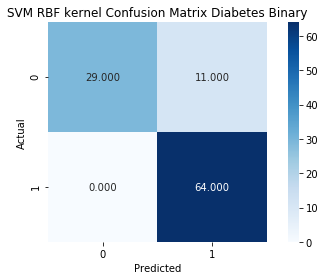

In [229]:
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train_scaled[:, [2, 3, 4, 10,12]],y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled[:, [2, 3, 4, 10,12]])

conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM RBF kernel Confusion Matrix Diabetes Binary')
plt.tight_layout()

In [230]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.8942307692307693, 0.10576923076923073, array([1.        , 0.85333333]), array([0.725, 1.   ]), array([0.84057971, 0.92086331])]


In [231]:
#Worst model so far

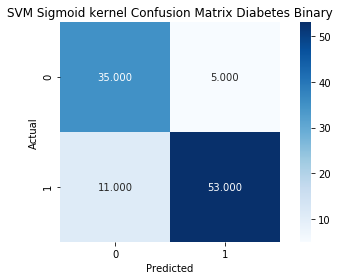

In [232]:
classifier = SVC(kernel = 'sigmoid')
classifier.fit(x_train_scaled[:, [2, 3, 10, 12]],y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled[:, [2, 3, 10, 12]])

conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Sigmoid kernel Confusion Matrix Diabetes Binary')
plt.tight_layout()

In [233]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.8461538461538461, 0.15384615384615385, array([0.76086957, 0.9137931 ]), array([0.875   , 0.828125]), array([0.81395349, 0.86885246])]


In [234]:
#This is the worst model seen so far and the worst kernel. 

In [235]:
# Now try to find the best c value
# based on accuracy 
values = [0.001,0.01,0.1,0.5,1.0,5.0,10]
prevAcc = 0.0
cVal = -1
for v in values:
    classifier = SVC(kernel = 'linear', C = v)
    classifier.fit(x_train_scaled[:, [2, 3, 4, 10,12]],y_train.values.ravel())
    y_pred = classifier.predict(x_val_scaled[:, [2, 3, 4, 10,12]])
    accuracy = metrics.accuracy_score(y_val,y_pred)
    if(accuracy > prevAcc):
        prevAcc = accuracy
        cVal = v
print(cVal)

0.1


In [236]:
#Best c val is 0.1 and best kernel is linear
classifier = SVC(kernel = 'linear', C = 0.1)
classifier.fit(x_train_scaled[:, [2, 3, 4, 10, 12]],y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled[:, [2, 3, 4, 10, 12]])

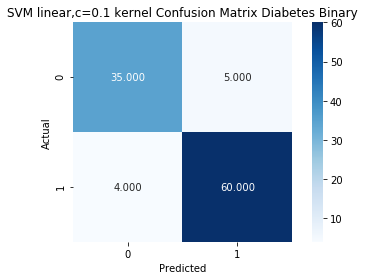

In [237]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM linear,c=0.1 kernel Confusion Matrix Diabetes Binary')
plt.tight_layout()

In [238]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.9134615384615384, 0.08653846153846156, array([0.8974359 , 0.92307692]), array([0.875 , 0.9375]), array([0.88607595, 0.93023256])]


In [239]:
#Around the same as decision tree. Slightly worse than K nearest neighbors with slightly less accuracy
# and F1 score is also less than k nearest neighbors

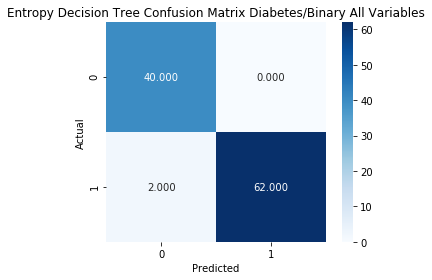

In [240]:
#Lets see if including all variable will give any insight 
#For decision tree it doesnt matter which one to choose 
Eclassifier = DecisionTreeClassifier(criterion="entropy")
Eclassifier.fit(x_train_scaled,y_train)
y_pred = Eclassifier.predict(x_val_scaled)

conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Entropy Decision Tree Confusion Matrix Diabetes/Binary All Variables')
plt.tight_layout()

In [241]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.9807692307692307, 0.019230769230769273, array([0.95238095, 1.        ]), array([1.     , 0.96875]), array([0.97560976, 0.98412698])]


In [242]:
#Much better this time. With the highest accuracy and F1 score yet.

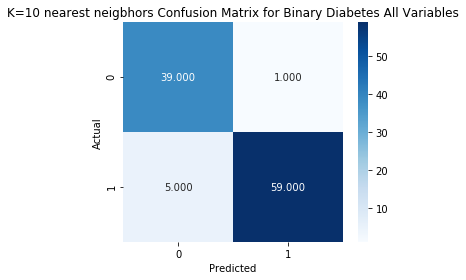

In [245]:
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train_scaled,y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled)
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('K=10 nearest neigbhors Confusion Matrix for Binary Diabetes All Variables')
plt.tight_layout()

In [246]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.9423076923076923, 0.05769230769230771, array([0.88636364, 0.98333333]), array([0.975   , 0.921875]), array([0.92857143, 0.9516129 ])]


In [247]:
#Slightly better than the original subset but not as good as entropy with all variables

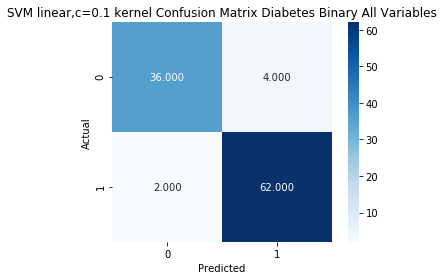

In [248]:
classifier = SVC(kernel = 'linear', C = 0.1)
classifier.fit(x_train_scaled,y_train.values.ravel())
y_pred = classifier.predict(x_val_scaled)
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM linear,c=0.1 kernel Confusion Matrix Diabetes Binary All Variables')
plt.tight_layout()

In [249]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val,y_pred,average = None)
recall = metrics.recall_score(y_val,y_pred,average=None)
F1_score = metrics.f1_score(y_val,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.9423076923076923, 0.05769230769230771, array([0.94736842, 0.93939394]), array([0.9    , 0.96875]), array([0.92307692, 0.95384615])]


In [ ]:
#Better model than original subset of variables but still decision tree with all variables is the best. 
#Best model is decision tree with all variables